In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('../output/measures/measure_broad_spectrum_proportion.csv')

In [3]:
df.date= pd.to_datetime(df.date)
df.rename(columns={'value':'broad_spectrum_proportion'},inplace=True)

In [5]:
## Ensure count columns are actually integers, and cast as such

nonint_count = len(df[df.broad_spectrum_antibiotics_prescriptions-np.abs(df.broad_spectrum_antibiotics_prescriptions) > 0])
if (nonint_count >0):
    raise ValueError(f'non-integer values for counts of broad_spectrum_antibiotics_prescriptions: {nonint_count} rows affected')

nonint_count = len(df[df.antibacterial_prescriptions-np.abs(df.antibacterial_prescriptions) > 0])
if (nonint_count >0):
    raise ValueError(f'non-integer values for counts of antibacterial_prescriptions: {nonint_count} rows affected')

df.broad_spectrum_antibiotics_prescriptions = df.broad_spectrum_antibiotics_prescriptions.astype(np.int32)
df.antibacterial_prescriptions = df.antibacterial_prescriptions.astype(np.int32)

In [6]:
## replace dummy data with values in expected range
df.broad_spectrum_proportion = np.percentile(df['broad_spectrum_proportion'].values,(10*np.arange(0,11)))

array([3.61366887e-05, 9.60821231e-02, 1.95901312e-01, 2.86329929e-01,
       3.80032766e-01, 4.80187458e-01, 5.76698088e-01, 6.86393111e-01,
       7.97112732e-01, 8.92509419e-01, 9.98854255e-01])

In [7]:
deciles = df.groupby('date')['broad_spectrum_proportion']\
            .quantile(np.arange(0,1.1,0.1))\
            .reset_index()\
            .rename(columns={'level_1':'decile'})\
            .set_index('date')\
            .pivot(columns='decile',values='broad_spectrum_proportion')\
            .rename(columns=lambda c: round(c,1))

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628., 18718., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

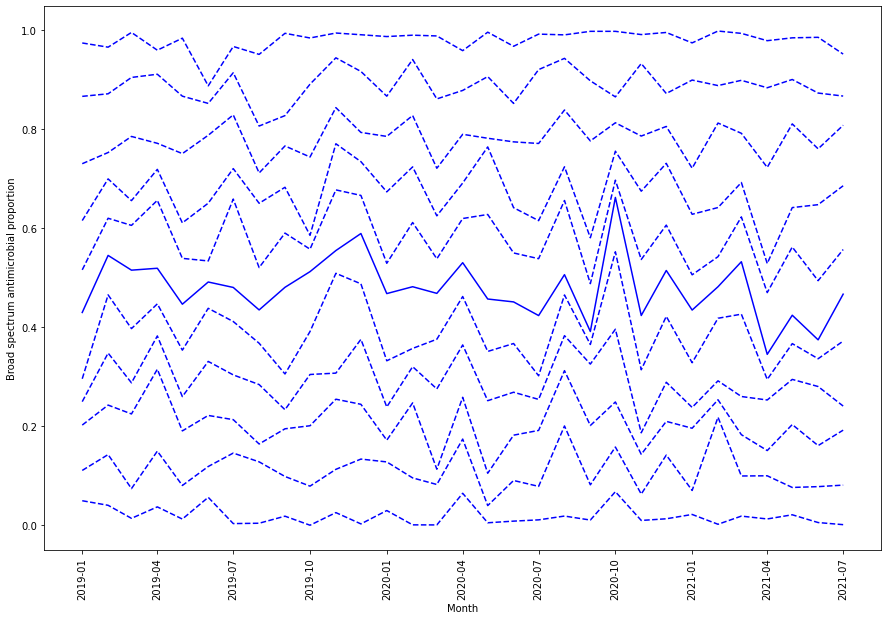

In [8]:
plt.rcParams['figure.figsize']=(15,10)
dfmt =mdates.DateFormatter("%b %Y")
for decile in deciles.columns:
    ls = '-' if decile==0.5 else '--'
    plt.plot(deciles[decile].index,deciles[decile].values,c='b',linestyle=ls)

plt.ylabel('Broad spectrum antimicrobial proportion')
plt.xlabel('Month')
plt.xticks(rotation=90)


In [9]:
deciles[0.1].values

array([0.11076267, 0.1428059 , 0.07406192, 0.14977847, 0.08036198,
       0.11870227, 0.14585513, 0.12810975, 0.09853194, 0.0790288 ,
       0.11298625, 0.1337155 , 0.12797439, 0.09565843, 0.08234948,
       0.17411606, 0.03972778, 0.09045945, 0.07851958, 0.20063805,
       0.08169694, 0.15807868, 0.06296418, 0.14176461, 0.07031968,
       0.21827915, 0.09954096, 0.09992661, 0.07635476, 0.07802559,
       0.08107646])